In [37]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#import the bike data 
df = pd.read_csv('totalData.csv')
df.head(3)

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Wind Chill,Berri1,Maisonneuve_2,Maisonneuve_1
0,2009.0,1.0,1.0,-14.7,-19.9,-17.3,0.0,0.0,-23.125000,59.916667,28.291667,17.375000,-25.875000,29.0,35.0,20.0
1,2009.0,1.0,2.0,-11.3,-16.2,-13.8,1.0,0.0,-17.029167,76.250000,7.083333,12.250000,-19.458333,19.0,22.0,3.0
2,2009.0,1.0,3.0,-8.1,-13.0,-10.6,0.0,0.0,-15.441667,67.958333,28.208333,22.541667,-18.708333,24.0,22.0,12.0


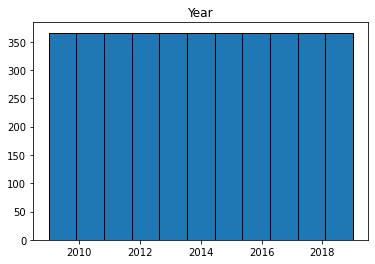

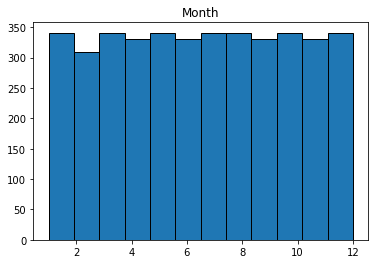

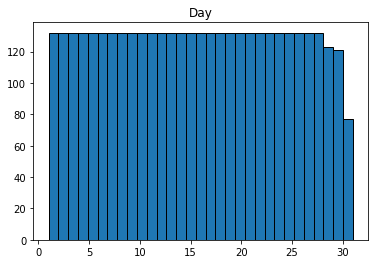

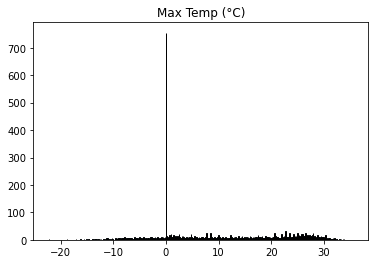

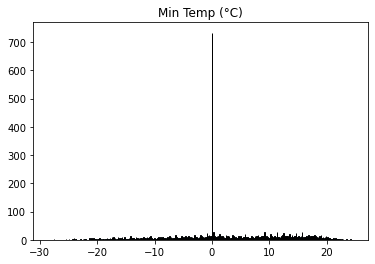

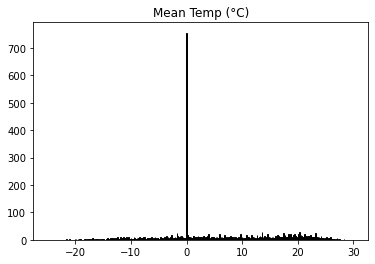

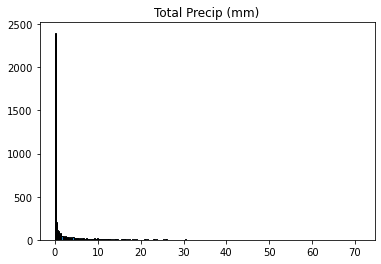

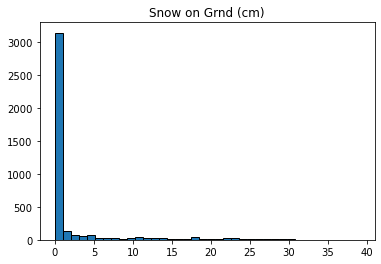

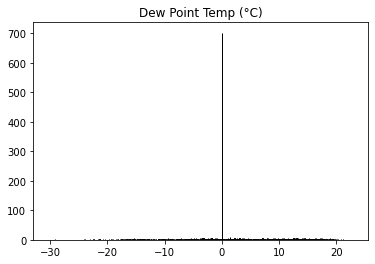

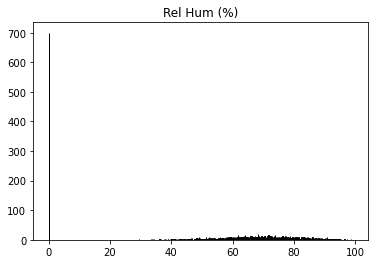

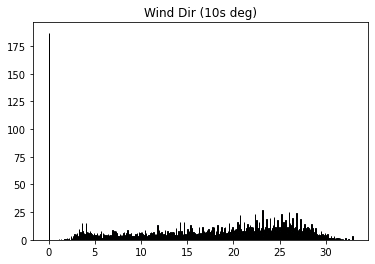

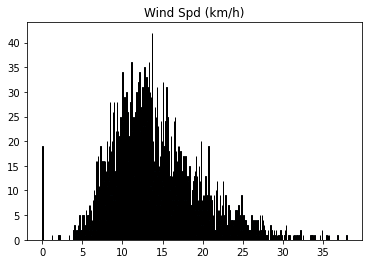

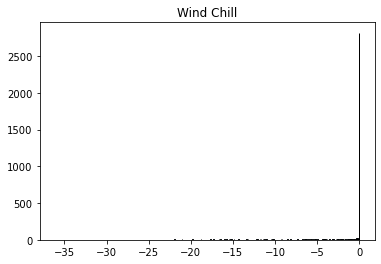

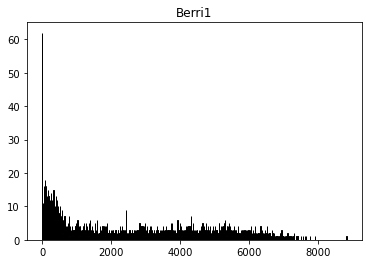

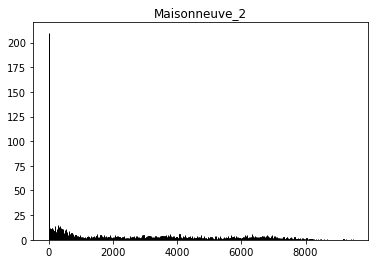

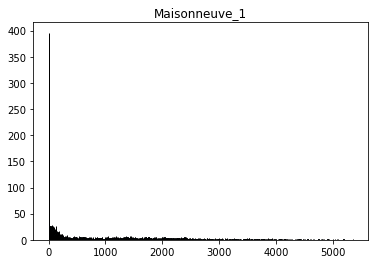

In [39]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=df[column].nunique(), edgecolor='k')
    plt.title(column)

Let's drop all the columns with zero bikes (note that although some days might really have 0 there is too much bias towards 0 due to the erroneous days)

In [40]:
df.columns

Index(['Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Wind Chill', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1'],
      dtype='object')

In [41]:
df = df.drop(df[(df['Berri1']==0) | (df['Maisonneuve_2']==0) | (df['Maisonneuve_1']==0)].index)

Let's plot the histograms again

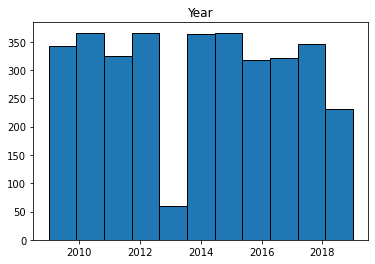

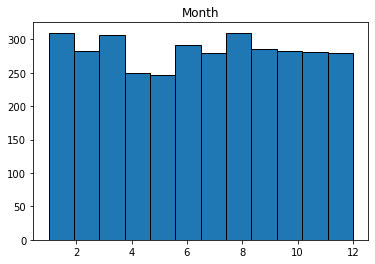

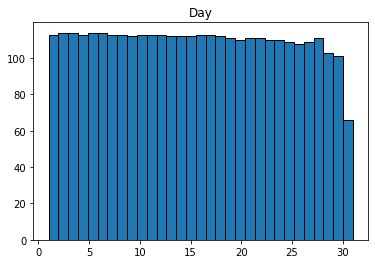

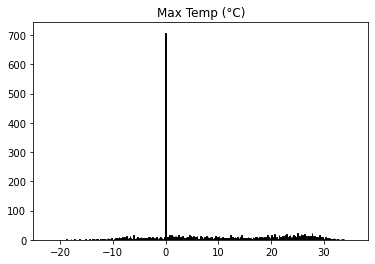

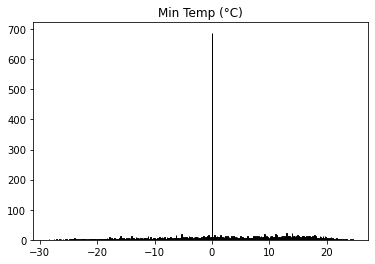

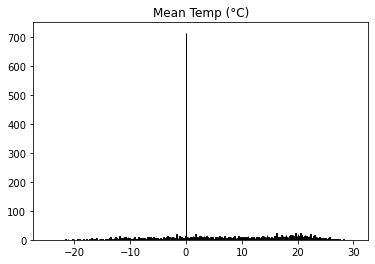

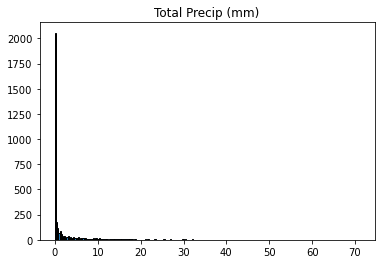

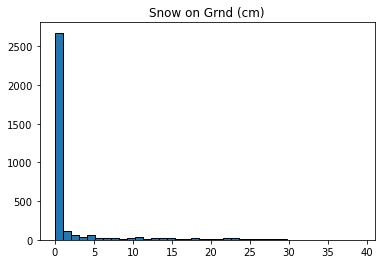

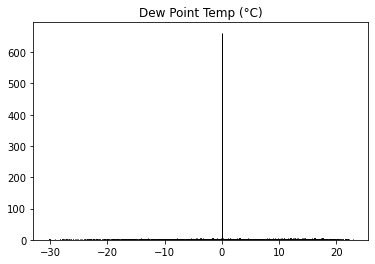

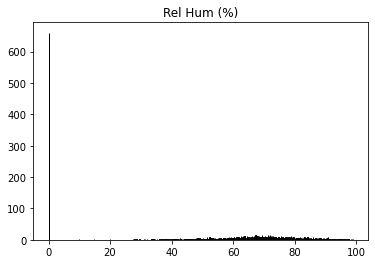

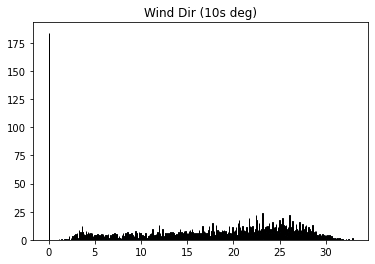

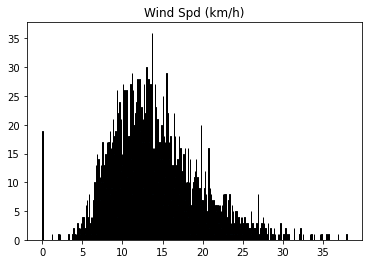

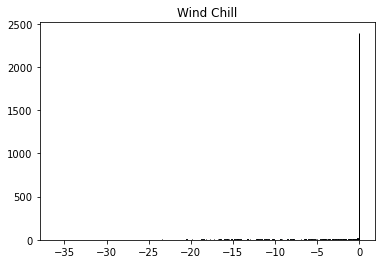

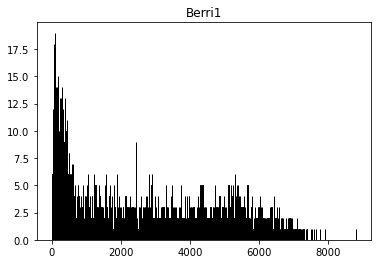

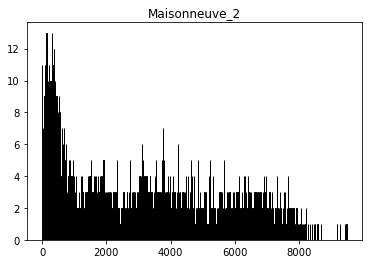

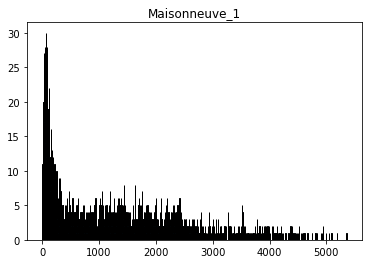

In [42]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=df[column].nunique(), edgecolor='k')
    plt.title(column)

Wind chill only appears when temperatures are below zero! This makes things complicated let's remove it for now
<br>
Let's also get rid of sparse columns like [Total Precip] and [Snow on Grnd (cm)] for now.

In [43]:
df = df.drop(columns=['Wind Chill','Total Precip (mm)','Snow on Grnd (cm)'])

Once more we plot the histograms

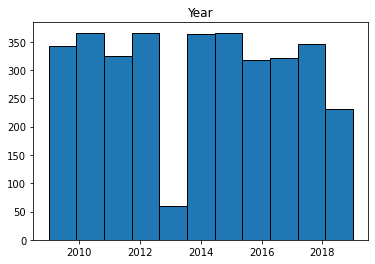

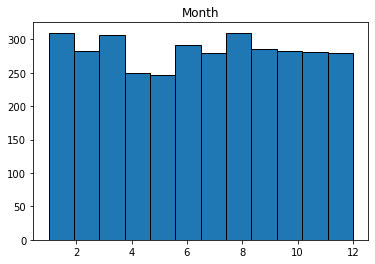

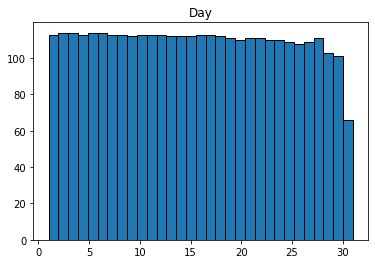

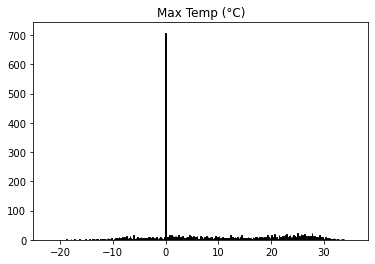

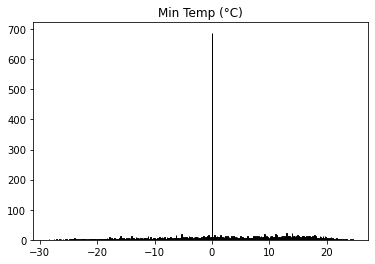

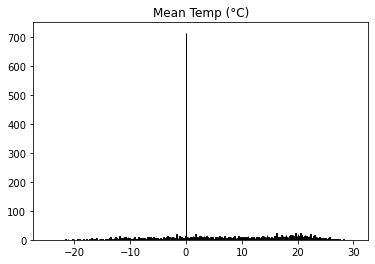

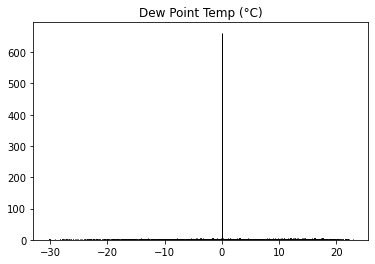

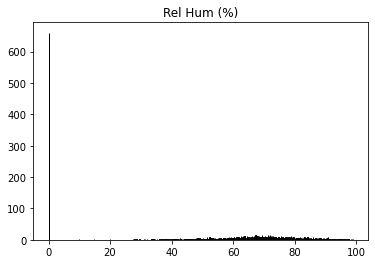

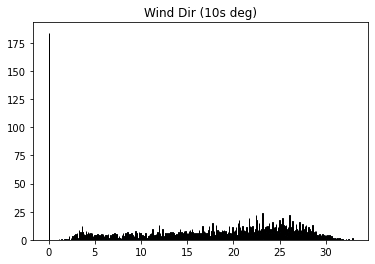

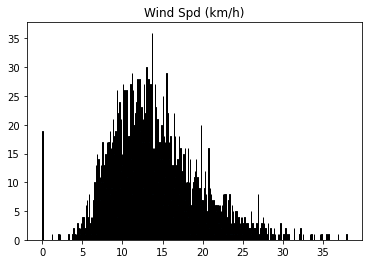

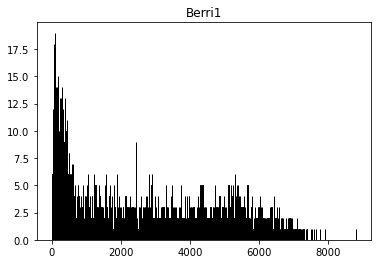

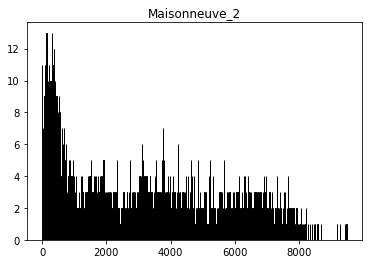

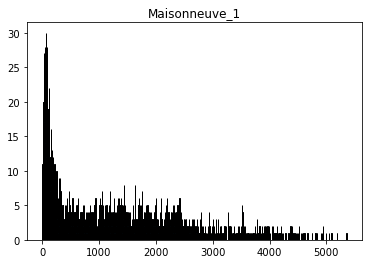

In [44]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=df[column].nunique(), edgecolor='k')
    plt.title(column)

Finally we drop the data sparse days where many things are missing simultaneously

In [45]:
df = df.drop(df[(df['Max Temp (°C)']==0) & (df['Min Temp (°C)']==0) & (df['Mean Temp (°C)']==0) & (df['Dew Point Temp (°C)']==0) & (df['Rel Hum (%)']==0)].index)

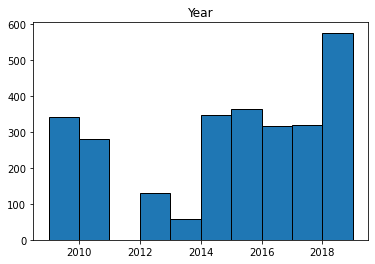

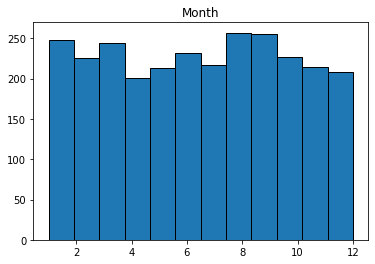

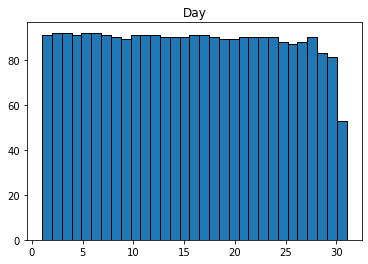

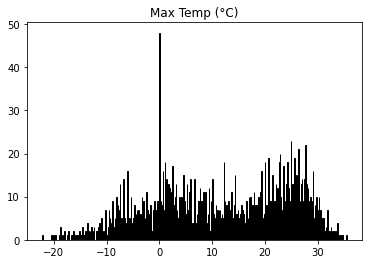

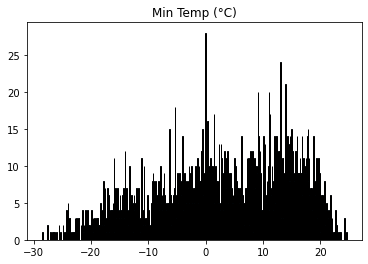

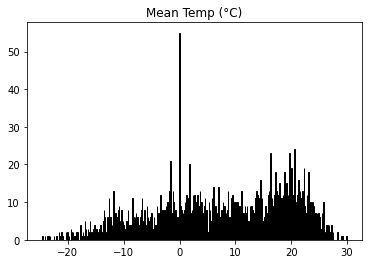

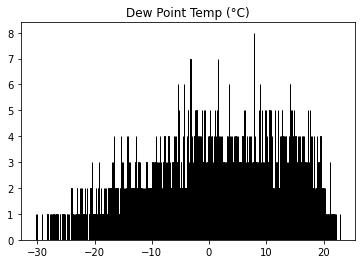

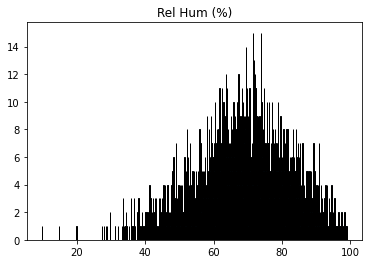

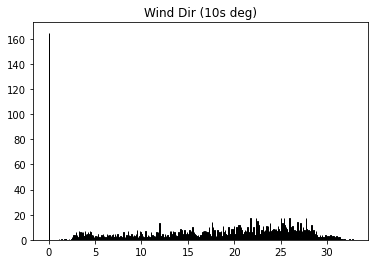

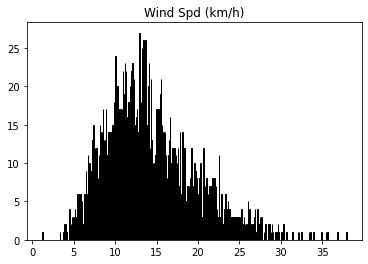

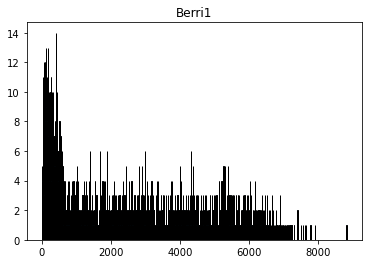

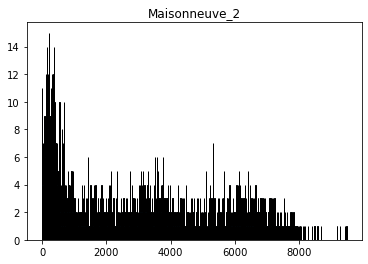

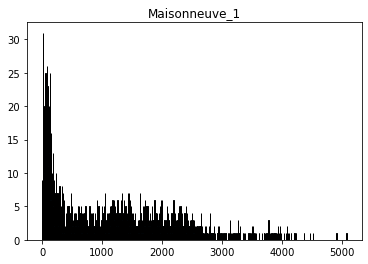

In [46]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=df[column].nunique(), edgecolor='k')
    plt.title(column)

While there are still some spurious spikes most of the anomalies have been adressed.
<br>
We save the dataset for loading into the mode

In [47]:
df.to_csv('processed_data.csv',index=None)

<i> extra stuff and data exploration

In [48]:
from sklearn import preprocessing

In [49]:
scaler = preprocessing.StandardScaler()
df  = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

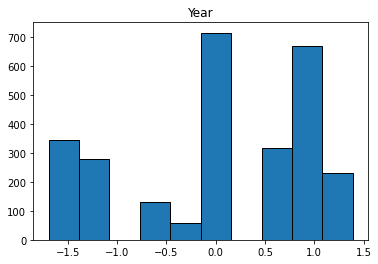

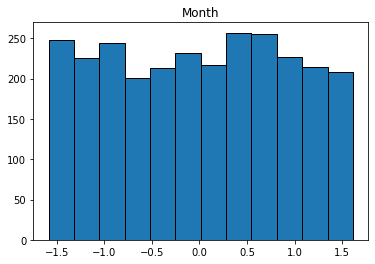

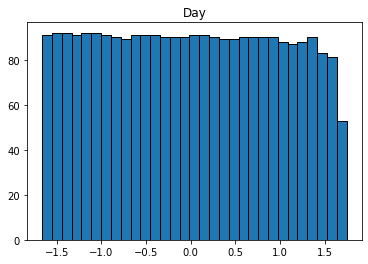

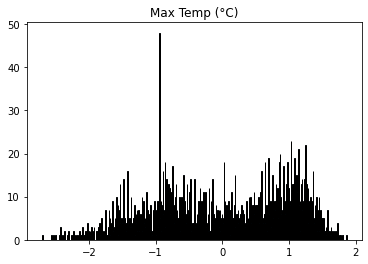

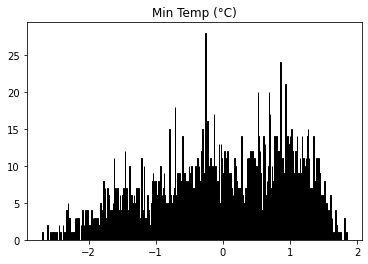

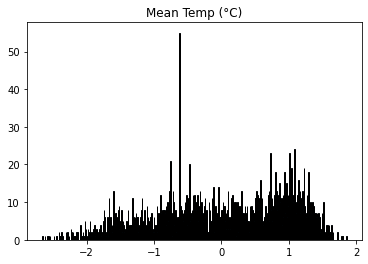

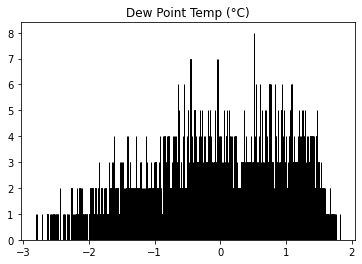

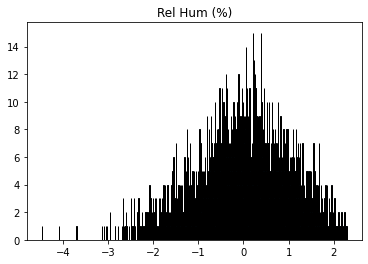

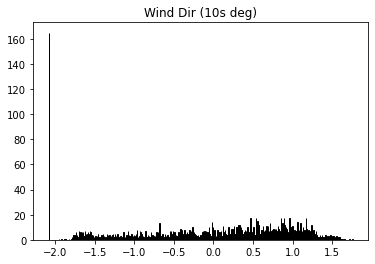

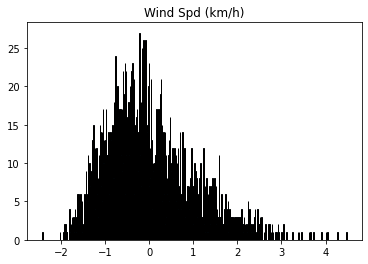

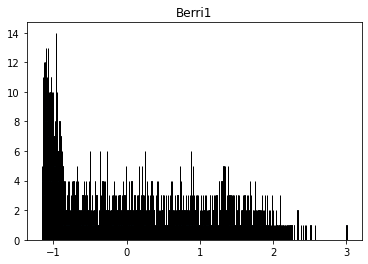

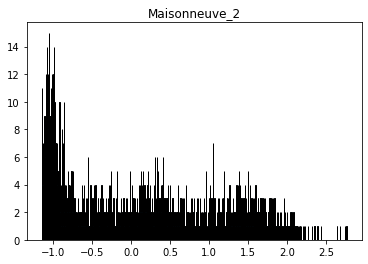

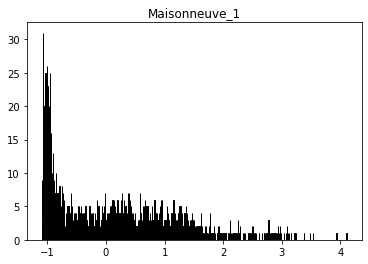

In [50]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=df[column].nunique(), edgecolor='k')
    plt.title(column)

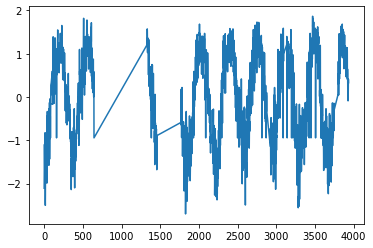

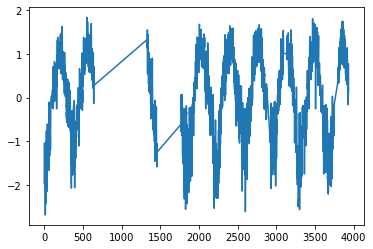

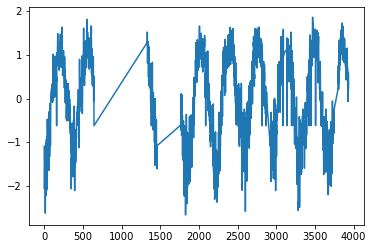

In [51]:
for item in ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)']:
    plt.figure()
    plt.plot(df[item])